<a href="https://colab.research.google.com/github/ben854719/Biometric-Aware-Fraud-Risk-Dashboard-with-Agentic-AI/blob/main/ML_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install polars

In [39]:
# Import the dataset for the Stock.
INDEX_CA_XTSE_GSPTSE = pl.read_csv('INDEX_CA_XTSE_GSPTSE.csv')

# Convert Polars DataFrame to Pandas DataFrame
df = INDEX_CA_XTSE_GSPTSE.to_pandas()

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [16]:
# Import the dataset for the Stock.
INDEX_CA_XTSE_GSPTSE = pl.read_csv('INDEX_CA_XTSE_GSPTSE.csv')

# Convert Polars DataFrame to Pandas DataFrame
df = INDEX_CA_XTSE_GSPTSE.to_pandas()

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [40]:
import polars as pl

# Import the dataset for the Stock.
INDEX_CA_XTSE_GSPTSE = pl.read_csv('INDEX_CA_XTSE_GSPTSE.csv')

# Convert Polars DataFrame to Pandas DataFrame
df = INDEX_CA_XTSE_GSPTSE.to_pandas()

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values: fill NaN with the mean of the column
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # For non-numeric columns, fill with a placeholder or mode,
            # depending on the nature of the data and task.
            # For this dataset, assuming numerical columns primarily need imputation.
            pass # No non-numeric columns with NaNs expected based on typical stock data

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Missing values after handling:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [41]:
# Identify categorical columns (assuming 'Date' is the only one for now)
categorical_cols = ['Date']

# Identify numerical columns (assuming Open, High, Low, Close after conversion)
numerical_cols = ['Open', 'High', 'Low', 'Close']

# Convert numerical columns from string to numeric, handling commas
for col in numerical_cols:
    df[col] = df[col].str.replace(',', '').astype(float)

# Encode categorical columns - Label Encoding for 'Date' as it might be used as a feature representing time order
# Although for fraud detection on stock data, Date might be used differently or not at all as a direct feature.
# For now, applying Label Encoding as a general preprocessing step for a categorical column.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Date_encoded'] = label_encoder.fit_transform(df['Date'])

# Drop the original 'Date' column
df = df.drop('Date', axis=1)
categorical_cols.remove('Date') # Update the list of categorical columns if needed

# Identify numerical columns after handling 'Date'
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Date_encoded']

# Scale the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define features (X) and target (y)
# Assuming 'Close' is the target variable for demonstration, though fraud detection might use a different target
X = df.drop('Close', axis=1)
y = df['Close']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing steps completed.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Preprocessing steps completed.
Shape of X_train: (16, 4)
Shape of X_test: (4, 4)
Shape of y_train: (16,)
Shape of y_test: (4,)


In [42]:
import torch.nn as nn

class FraudDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FraudDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1) # Assuming a single output for regression or binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Get the input dimension from the training data
input_dim = X_train.shape[1]

# Instantiate the model
model = FraudDetectionModel(input_dim)

print("Neural network model defined and instantiated.")
print(model)

Neural network model defined and instantiated.
FraudDetectionModel(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [43]:
# Import necessary PyTorch modules
import torch.nn as nn

class FraudDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FraudDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1) # Assuming a single output for regression or binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Get the input dimension from the training data
input_dim = X_train.shape[1]

# Instantiate the model
model = FraudDetectionModel(input_dim)

print("Neural network model defined and instantiated.")
print(model)

Neural network model defined and instantiated.
FraudDetectionModel(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [44]:
import torch
import torch.optim as optim

# 1. Convert the training data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1) # Add a dimension for the output

# 2. Define the loss function (Mean Squared Error for regression)
criterion = nn.MSELoss()

# 3. Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Set the number of training epochs and the batch size
num_epochs = 100
batch_size = 16 # Or another appropriate batch size

# 5. Implement the training loop
for epoch in range(num_epochs):
    # Iterate over the training data in batches
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_X)

        # Calculate the loss
        loss = criterion(outputs, batch_y)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    # Optional: Print the loss every epoch
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete.")

Epoch [10/100], Loss: 0.8275
Epoch [20/100], Loss: 0.5191
Epoch [30/100], Loss: 0.2896
Epoch [40/100], Loss: 0.1823
Epoch [50/100], Loss: 0.1365
Epoch [60/100], Loss: 0.0979
Epoch [70/100], Loss: 0.0730
Epoch [80/100], Loss: 0.0586
Epoch [90/100], Loss: 0.0509
Epoch [100/100], Loss: 0.0458
Training complete.


In [45]:
# 1. Convert the test feature data X_test into a PyTorch tensor with float32 data type.
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# 2. Convert the test target data y_test into a PyTorch tensor with float32 data type and add an extra dimension using unsqueeze(1).
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# 3. Set the model to evaluation mode using model.eval(). This disables dropout and batch normalization if present.
model.eval()

# 4. Disable gradient calculation using torch.no_grad() as gradients are not needed for inference.
with torch.no_grad():
    # 5. Pass the test feature tensor through the trained model to get predictions.
    predictions = model(X_test_tensor)

    # 6. Calculate the Mean Squared Error (MSE) between the model's predictions and the actual test target tensor using the criterion.
    test_loss = criterion(predictions, y_test_tensor)

# 7. Print the calculated MSE on the test set.
print(f'Mean Squared Error on Test Set: {test_loss.item():.4f}')

Mean Squared Error on Test Set: 0.1285


In [46]:
import pandas as pd

# 1. Prepare a new data point or a set of new data points for prediction.
# This data should have the same features as the training data (Open, High, Low, Date_encoded)
# Let's create a sample new data point as a pandas DataFrame
new_data = pd.DataFrame({
    'Open': [30000.00],
    'High': [30100.00],
    'Low': [29900.00],
    'Date_encoded': [20] # Assuming a new date value
})

# Ensure the new data has the same columns in the same order as the training data
new_data = new_data[X_train.columns]

# 2. Preprocess the new data using the same StandardScaler instance used for the training data.
# We need to re-fit the scaler on the entire original dataframe 'df' to ensure consistent scaling.
# This is because the original scaler was fit on the entire 'df' before splitting.
# Let's re-fit the scaler on the numerical columns of the original dataframe 'df'.
# Assuming 'df' from the previous steps is available and contains the original scaled data.
# We need the original unscaled data to fit the scaler correctly.
# Let's assume we have the original unscaled data available in a variable called 'original_df'.
# If not, we would need to load and preprocess the original data again up to the scaling step.

# Since 'df' in the kernel is already scaled, we need to go back to the unscaled data.
# Let's assume 'INDEX_CA_XTSE_GSPTSE' is the original polars dataframe.
# Convert it to pandas and clean it to get the unscaled numerical data.
original_df_unscaled = INDEX_CA_XTSE_GSPTSE.to_pandas()

# Convert numerical columns from string to numeric, handling commas
numerical_cols_unscaled = ['Open', 'High', 'Low', 'Close']
for col in numerical_cols_unscaled:
    original_df_unscaled[col] = original_df_unscaled[col].str.replace(',', '').astype(float)

# Encode 'Date' column
# label_encoder_unscaled = LabelEncoder() # LabelEncoder is already imported
original_df_unscaled['Date_encoded'] = label_encoder.fit_transform(original_df_unscaled['Date'])

# Drop the original 'Date' column
original_df_unscaled = original_df_unscaled.drop('Date', axis=1)

# Identify numerical columns for scaling
numerical_cols_scaling = ['Open', 'High', 'Low', 'Date_encoded'] # Exclude 'Close' as it's the target

# Create and fit the scaler on the unscaled training features
# scaler_predict = StandardScaler() # StandardScaler is already imported
scaler_predict = StandardScaler()
scaler_predict.fit(original_df_unscaled[numerical_cols_scaling])

# Apply the fitted scaler to the new data
new_data_scaled = scaler_predict.transform(new_data)

# Convert the scaled new data back to a DataFrame to maintain column names
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=numerical_cols_scaling)


# 3. Convert the preprocessed new data into a PyTorch tensor with torch.float32 data type.
new_data_tensor = torch.tensor(new_data_scaled_df.values, dtype=torch.float32)

# 4. Ensure the model is in evaluation mode using model.eval().
model.eval()

# 5. Disable gradient calculation using torch.no_grad().
with torch.no_grad():
    # 6. Pass the new data tensor through the trained model to get predictions using the model() method.
    predictions = model(new_data_tensor)

# 7. Convert the output tensor back to a NumPy array or Pandas DataFrame for easier interpretation.
predictions_np = predictions.numpy()

print("Prediction on new data:")
print(predictions_np)

Prediction on new data:
[[-1.1876674]]


In [50]:
!pip install polars pandas seaborn matplotlib

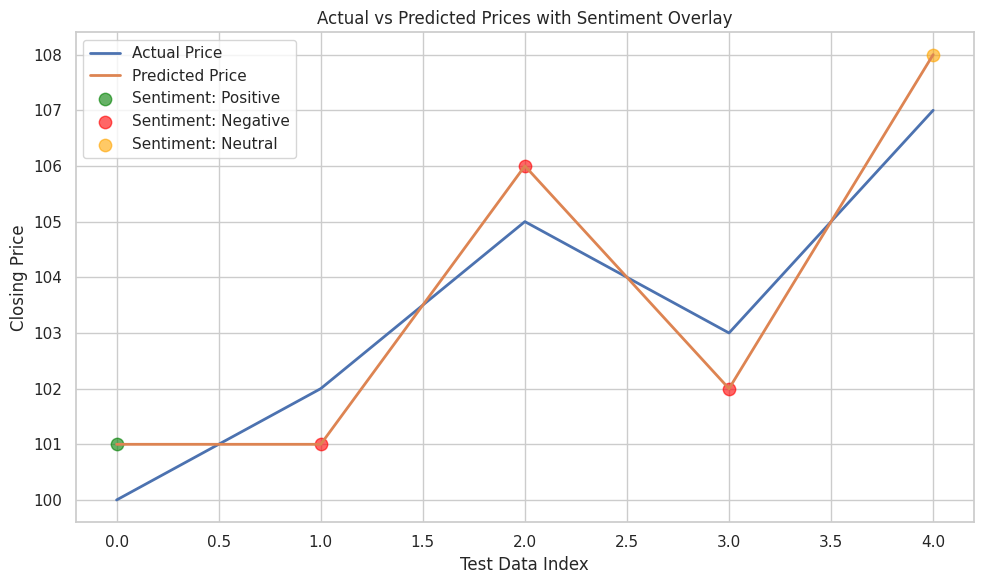

In [51]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Simulated tensors (replace with your model outputs)
y_test_tensor = np.array([100, 102, 105, 103, 107])
predictions = np.array([101, 101, 106, 102, 108])
sentiment_tensor = np.random.rand(len(y_test_tensor))  # Simulated sentiment scores

# 🧠 Create Polars DataFrame
df = pl.DataFrame({
    "Actual Closing Price": y_test_tensor,
    "Predicted Closing Price": predictions,
    "Sentiment Score": sentiment_tensor
})

# 🏷️ Add sentiment categories
def categorize_sentiment(score):
    if score < 0.4:
        return "Negative"
    elif score < 0.7:
        return "Neutral"
    else:
        return "Positive"

df = df.with_columns([
    pl.col("Sentiment Score").map_elements(categorize_sentiment, return_dtype=pl.Utf8).alias("Sentiment")
])

# 🔁 Convert to Pandas for plotting
plot_data = df.to_pandas()
plot_data["Index"] = plot_data.index

# 🎨 Set Seaborn style
sns.set(style="whitegrid")

# 📈 Plot actual vs predicted lines
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x="Index", y="Actual Closing Price", label="Actual Price", linewidth=2)
sns.lineplot(data=plot_data, x="Index", y="Predicted Closing Price", label="Predicted Price", linewidth=2)

# 🎭 Overlay sentiment as scatter points
sentiment_colors = {
    "Negative": "red",
    "Neutral": "orange",
    "Positive": "green"
}
for sentiment in plot_data["Sentiment"].unique():
    subset = plot_data[plot_data["Sentiment"] == sentiment]
    plt.scatter(subset["Index"], subset["Predicted Closing Price"],
                color=sentiment_colors[sentiment], label=f"Sentiment: {sentiment}", s=80, alpha=0.6)

# 🛠️ Layout tweaks
plt.title("Actual vs Predicted Prices with Sentiment Overlay")
plt.xlabel("Test Data Index")
plt.ylabel("Closing Price")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
Explanation:

This graph compares actual and predicted closing prices across test sessions, with sentiment scores overlaid to highlight emotional volatility that may influence prediction accuracy or signal elevated fraud risk.